In [1]:
#packages needed

import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.simplefilter(action='ignore')

#text normalization function
%run ./Text_Normalization_Function.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fortunagd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/fortunagd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fortunagd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fortunagd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [2]:
# Load data from file
df = pd.read_json('data/AMAZON_FASHION_5.json.gz', lines = True, compression='gzip')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [4]:
# Define review as positive if overall score is larger or equal than 3, otherwise define it as negative
df["polarity"]= ["positive" if x>=3 else "negative" for x in df["overall"]]
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,polarity
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,positive
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,positive
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,positive
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,positive
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,positive


In [5]:
pos = df[df['polarity']=='positive']
neg = df[df['polarity']=='negative']
from sklearn.model_selection import train_test_split
pos_train ,pos_test = train_test_split(pos,test_size=0.5)
neg_train, neg_test = train_test_split(neg,test_size=0.5)
train = pd.concat([pos_train,neg_train], sort=True)
test = pd.concat([pos_test,neg_test], sort=True)
print(train.overall[train['polarity']=='positive'].count())
print(test.overall[test['polarity']=='positive'].count())

1483
1483


In [6]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
train ,test = train_test_split(df,test_size=0.5)
print("Dimensions for test data:", test.shape)
print("Dimensions for training data:", train.shape,"\n")
# change reviews to string type
train['reviewText'] = train['reviewText'].astype('str')
test['reviewText'] = test['reviewText'].astype('str')

Dimensions for test data: (1588, 13)
Dimensions for training data: (1588, 13) 



In [7]:
print('human defined positive reviews:', df.overall[df['polarity']=='positive'].count())
print('human defined positive reviews:',df.overall[df['polarity']=='negative'].count())

human defined positive reviews: 2966
human defined positive reviews: 210


In [8]:
# split training and test dataframes into reviews and polarity dataframes
train_reviews = np.array(train['reviewText'])
train_polarity = np.array(train['polarity'])
test_reviews = np.array(test['reviewText'])
test_polarity = np.array(test['polarity'])

In [9]:
# Normalize the text for reviews
normalized_reviews = normalize_corpus(df['reviewText'].astype('str'))
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

### VADER Lexicon-Based Sentiment Analysis

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fortunagd/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Set 0.1 VADER score as the threshold for defining a positive review
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [37]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()    
print('Average VADER Score is:', VADER_polarity_test_df['VADER Score'].mean())

Average VADER Score is: 0.5964399874055419


In [14]:
# Accuracy rate when threshold is 0.1
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_polarity, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.873 



In [15]:
# Confusion matrix
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,69,37,106
positive,164,1318,1482
All,233,1355,1588


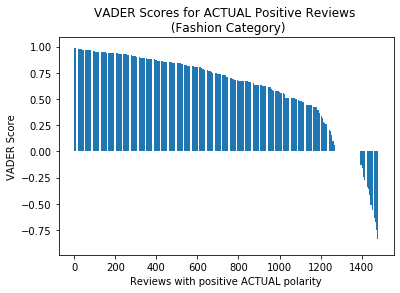

In [54]:
# VADER scores assigned to actual positive reviews

import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:1482]['VADER Score']
plt.bar(range(0, 1482), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (Fashion Category)")
plt.show()

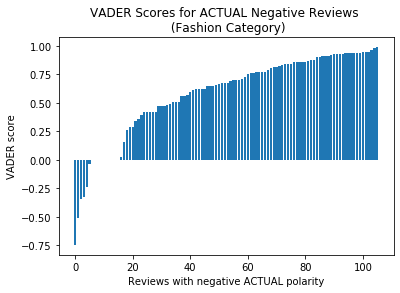

In [44]:
# VADER scores assigned to actual negative reviews

neg_reviews_scored = VADER_polarity_test_df[1482:]['VADER Score']
plt.bar(range(0, 106), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (Fashion Category)")
plt.show()

We can see that VADER lexicon is better classify positive reviews, since more actual positive reviews are above the threshold. While for negative reviews, only a few actual negative reviews have VADER score below threshold.

In [18]:
# Adjusting the threshold parameter for defining positive polarity to achieve the highest accuracy rate

def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy) 

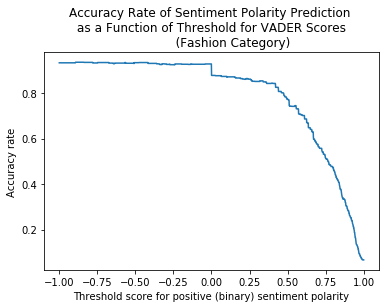

In [50]:
thresholds = np.linspace(-1,1,1588)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n\
           (Fashion Category)")
plt.show()

In [20]:
# threshold of highest accuracy
thresholds[acc_rates.index(max(acc_rates))] 

-0.8928796471329552

To maximize the predicton accuracy rate, threshold is -0.89287.

In [21]:
# To achieve the highest precision

def try_threshold_for_precision(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    precision = np.round(metrics.precision_score(test_polarity, VADER_binary_polarity, pos_label='positive'), 3)
    return(precision) 

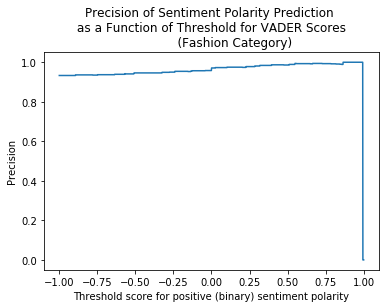

In [52]:
thresholds = np.linspace(-1,1,1588)
precision = [try_threshold_for_precision(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, precision)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Precision")
plt.title("Precision of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n\
            (Fashion Category)")
plt.show()

In [23]:
thresholds[precision.index(max(precision))] 

0.8651543793320731

To maximize precision, threshold is 0.86515.

In [24]:
def try_threshold_for_recall(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    recall = np.round(metrics.recall_score(test_polarity, VADER_binary_polarity, pos_label='positive'), 3)
    return(recall) 

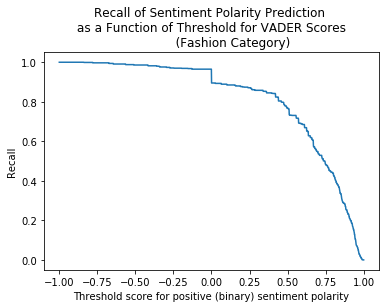

In [53]:
thresholds = np.linspace(-1,1,1588)
recall = [try_threshold_for_recall(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, recall)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Recall")
plt.title("Recall of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n\
           (Fashion Category)")
plt.show()

In [26]:
thresholds[recall.index(max(recall))] 

-1.0

To maximize recall, threshold is -1.

### Support Vector Machines Sentiment Analysis
Start by vectorizing the normalized training dataset. Let's use TF-IDF approach and use a mix of uni-grams and bi-grams as features.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

In [28]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,169lbs,169lbs muscle,1st,1st pair,257lbs,257lbs bone,2nd,2nd pair,3rd,3rd pair,...,zing,zing need,zumba,zumba although,zumba class,zumba heel,zumba really,zumba trial,zumba yeah,zumba zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Vectorize test dataset
feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)

In [30]:
# use Support Vector Machines (SVM) to train our custom sentiment classifier

from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, train_polarity)
predicted_svm = svm.predict(feature_matrix_TEST) 

In [31]:
# Accuracy rate of SVM
print('Accuracy rate:', np.round(metrics.accuracy_score(test_polarity, predicted_svm), 3))

Accuracy rate: 0.999


Accuracy rate of Support Vector Machines is much higher than VADER Lexicon unsupervised method, therefore it's better to use SVM as classifier for Amazon reviews data.

### Word Cloud

In [32]:
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

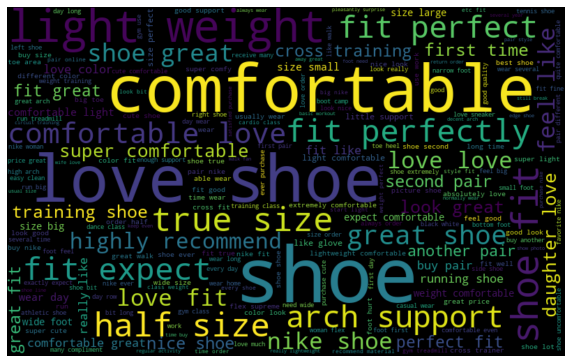

In [33]:
# Word cloud for all reviews
all_words = ' '.join([text for text in normalized_reviews])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
def analyze_sentiment_vader_lexicon_binary(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
    return binary_sentiment 

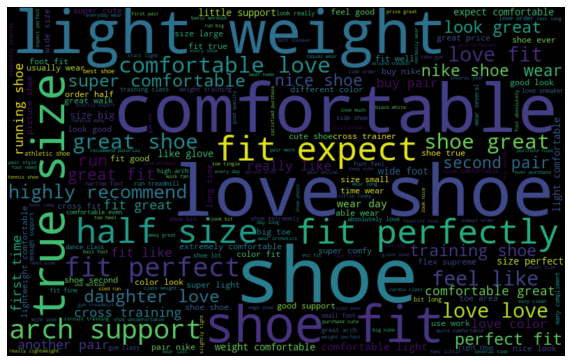

In [35]:
# Word cloud for VADER lexicon defined positive reviews when threshold is 0.1
VADER_positive_words = ' '.join([review for review in normalized_reviews 
                           if analyze_sentiment_vader_lexicon_binary(review, threshold=0.1)=="positive" ])

VADER_po_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(VADER_positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(VADER_po_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

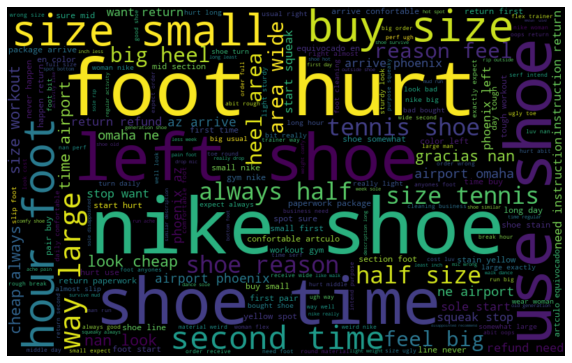

In [36]:
# Word cloud for VADER lexicon defined negative reviews when threshold is 0.1
VADER_negative_words = ' '.join([review for review in normalized_reviews 
                           if analyze_sentiment_vader_lexicon_binary(review, threshold=0.1)=="negative" ])

VADER_ne_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(VADER_negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(VADER_ne_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

From wordclouds above, we can see overall, 'comfortable','love' ,'shoe' are the most frequent words. In the VADER lexicon defined positive reviews, 'comfortable','love' ,'shoe', 'light weight','fit perfectly' are the most popular words. In the VADER lexicon defined negative reviews, 'foot hurt','nike shoe','left show','shoe time' are the most popular words.